<a href="https://colab.research.google.com/github/Riteshdahal/NeuralNetworkExample/blob/main/HCL_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pickle

In [2]:
#training data for HCl
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data2.csv")
df2

,SawDust(Gram),AcidConcentration(mol/L),Glucose Yield (Theoretical ),Glucose Yield,Ethanol Yield (Theoretical),Ethanol Yield
0,100,0.60,4.40,NaN,2.50,NaN
1,100,6.00,15.23,NaN,13.14,NaN
2,100,11.00,29.30,NaN,25.31,NaN
3,100,11.97,36.40,NaN,32.26,NaN


In [3]:
#testing data for HCl
df3=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data3.csv")
df3


,SawDust(Gram),AcidConcentration(mol/L),Glucose Yield (practical ),Ethanol Yield (Practical)
0,100,0.60,0.02,0.97
1,100,6.00,10.50,9.22
2,100,11.00,20.00,19.00
3,100,11.97,30.00,27.00


In [4]:
#Deleting Glucose Yield and Ethanol Yield as for training data we are using the data optained in our project

In [5]:
df2.pop('Glucose Yield')
df2

,SawDust(Gram),AcidConcentration(mol/L),Glucose Yield (Theoretical ),Ethanol Yield (Theoretical),Ethanol Yield
0,100,0.60,4.40,2.50,NaN
1,100,6.00,15.23,13.14,NaN
2,100,11.00,29.30,25.31,NaN
3,100,11.97,36.40,32.26,NaN


In [6]:
df2.pop('Ethanol Yield')
df2


,SawDust(Gram),AcidConcentration(mol/L),Glucose Yield (Theoretical ),Ethanol Yield (Theoretical)
0,100,0.60,4.40,2.50
1,100,6.00,15.23,13.14
2,100,11.00,29.30,25.31
3,100,11.97,36.40,32.26


In [7]:
df2

,SawDust(Gram),AcidConcentration(mol/L),Glucose Yield (Theoretical ),Ethanol Yield (Theoretical)
0,100,0.60,4.40,2.50
1,100,6.00,15.23,13.14
2,100,11.00,29.30,25.31
3,100,11.97,36.40,32.26


In [8]:
X=df2.drop(columns="Ethanol Yield (Theoretical)")
X

,SawDust(Gram),AcidConcentration(mol/L),Glucose Yield (Theoretical )
0,100,0.60,4.40
1,100,6.00,15.23
2,100,11.00,29.30
3,100,11.97,36.40


In [9]:
Y=df2["Ethanol Yield (Theoretical)"]
Y

0     2.50
1    13.14
2    25.31
3    32.26
Name: Ethanol Yield (Theoretical), dtype: float64

In [10]:
lr=LinearRegression()

In [11]:
lr.fit(X,Y)

LinearRegression()

In [12]:
c=lr.intercept_
c

-1.2962687135834976

In [13]:
m=lr.coef_
m

array([0.        , 0.0837542 , 0.88970424])

In [14]:
y_training_predict=lr.predict(X)
y_training_predict

array([ 2.66868248, 12.75645212, 25.69336184, 32.09150355])

In [16]:
r2=r2_score(Y,y_training_predict)
r2

0.9993255262552183

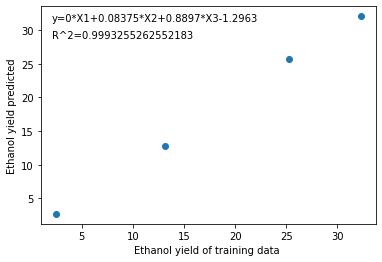

In [21]:

plt.scatter(Y,y_training_predict)
plt.figtext(0.15,0.83,f'y=0*X1+0.08375*X2+0.8897*X3-1.2963')
plt.figtext(0.15,0.77,f'R^2={r2}')
plt.xlabel("Ethanol yield of training data ")
plt.ylabel("Ethanol yield predicted")
plt.show()


In [23]:
r2_score(Y,y_training_predict)


0.9993255262552183

In [24]:
#NOW testing data 
df3

,SawDust(Gram),AcidConcentration(mol/L),Glucose Yield (practical ),Ethanol Yield (Practical)
0,100,0.60,0.02,0.97
1,100,6.00,10.50,9.22
2,100,11.00,20.00,19.00
3,100,11.97,30.00,27.00


In [25]:
X_test=df3.drop(columns="Ethanol Yield (Practical)")
X_test

,SawDust(Gram),AcidConcentration(mol/L),Glucose Yield (practical )
0,100,0.60,0.02
1,100,6.00,10.50
2,100,11.00,20.00
3,100,11.97,30.00


In [26]:
Y_test=df3["Ethanol Yield (Practical)"]
Y_test

0     0.97
1     9.22
2    19.00
3    27.00
Name: Ethanol Yield (Practical), dtype: float64

In [27]:
Y_test_predict=lr.predict(X_test)
Y_test_predict

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Glucose Yield (practical )
Feature names seen at fit time, yet now missing:
- Glucose Yield (Theoretical )

  warnings.warn(message, FutureWarning)


array([-1.22822211,  8.54815105, 17.41911236, 26.39739638])

In [28]:
r2=r2_score(Y_test,Y_test_predict)
r2

0.9789304937509775

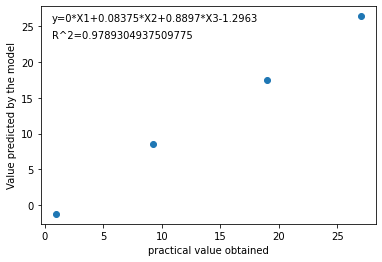

In [29]:
plt.scatter(Y_test,Y_test_predict)
plt.figtext(0.15,0.83,f'y=0*X1+0.08375*X2+0.8897*X3-1.2963')
plt.figtext(0.15,0.77,f'R^2={r2}')

plt.xlabel("practical value obtained")
plt.ylabel("Value predicted by the model")
plt.show()

In [ ]:
# # save the model to disk
# HCL_model="hcl_model.sav"
# pickle.dump(lr, open(HCL_model, 'wb')).
 
# # load the model from disk
# loaded_model = pickle.load(open(HCL_model, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)